# Data

In [182]:
from mlp.data_providers import EMNISTDataProvider
seed = 10102016
rng = np.random.RandomState(seed)
batch_size = 100
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']
['inputs', 'targets']


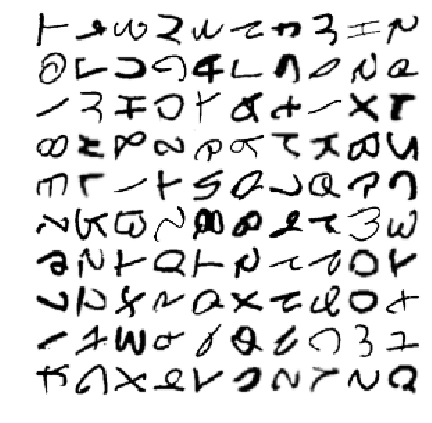

In [194]:
inputs_batch, targets_batch = next(train_data)
fig, ax = show_batch_of_images(inputs_batch.reshape((-1,28,28)), fig_size=(6,6))

In [191]:
fig.savefig('./train_data_preview.pdf', format='pdf', bbox_inches='tight')

# Baseline Model

In [5]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pickle as pkl
import numpy as np
from collections import OrderedDict
from pprint import pprint
from mlp.artist import plot_param_histogram, show_batch_of_images, visualise_first_layer_weights, plot_graph_mean_std
from mlp.helper import analyse_mean_std, generate_mean_std, train_model_and_plot_stats, wilcoxonTest

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Varying number of layers (for different activation function)

Hypothesis 1: There is a difference in validation accuracy when the number of hidden layers increases from 2 to 10.

Hypothesis 2: For the same number of layers, different activation functions will vary the results.


***Experiment Parameters:***
    
    Number of trials: range(1,4)
    layers_depth = [1,3,5,7] == [2,4,6,8]
    funcs = {'sigmoid':SigmoidLayer(), 
             'relu':ReluLayer(), 
             'elu':ELULayer(), 
             'selu':SELULayer()}
    num_epochs = 60
    num_hidden_unit = 100
    SGD(learningrule =  0.01)
    Early stopping = NO
    

    NOTE THE DIFFERENCES IN THE MODELS::::::!!!!!! 02 series have 7 tuple

In [8]:
# Group the output by activation function:
models_sigmoid = OrderedDict()
models_elu = OrderedDict()
models_selu = OrderedDict()
models_relu = OrderedDict()

sigmoid = {}
relu = {}
elu = {}
selu = {}
layers_depth = [1, 3, 5, 7]  # +1 to each for the total number of layers:

for func, store in {
        'relu': relu,
        'elu': elu,
        'sigmoid': sigmoid,
        'selu': selu
}.items():
    for layers in layers_depth:
        store[layers+1] = {}
        store[layers+1]['val_err'] = []
        store[layers+1]['val_acc'] = []
        store[layers+1]['train_err'] = []
        store[layers+1]['train_acc'] = []
        store[layers+1]['test_acc'] = []
        
        for trials in range(3):
            title = "01_02_ActFunc_Layers/actfunc_expt_t{}_d{}_{}.pkl".format(trials, layers, func)
            try:
                model, stats, keys, run_time = pkl.load(open(title, 'rb'))
            except ValueError:
                stats,keys,run_time,_,_,_,_ = pkl.load(open(title, 'rb'))

            # Store the model:
            store[layers+1]['val_err'].append(stats[1:, keys['error(valid)']])
            store[layers+1]['val_acc'].append(stats[1:, keys['acc(valid)']])
            store[layers+1]['train_err'].append(stats[1:, keys['error(train)']])
            store[layers+1]['train_acc'].append(stats[1:, keys['acc(train)']])
            store[layers+1]['test_acc'].append(stats[1:, keys['acc(test)']])
            

In [9]:
# Store model for later:
for func, store in {
    'relu': models_relu,
    'elu': models_elu,
    'selu': models_selu,
    'sigmoid': models_sigmoid
}.items():
    for layers in layers_depth:
        for trials in range(2):
            title = "01_02_ActFunc_Layers/actfunc_expt_t{}_d{}_{}.pkl".format(trials, layers, func)
            model, _, _, _ = pkl.load(open(title, 'rb'))
            store[layers+1] = model

### `Sigmoid` Activation Function:

In [10]:
mu_rho_sigmoid = generate_mean_std(sigmoid)
best_epochs_sigmoid = analyse_mean_std(mu_rho_sigmoid)

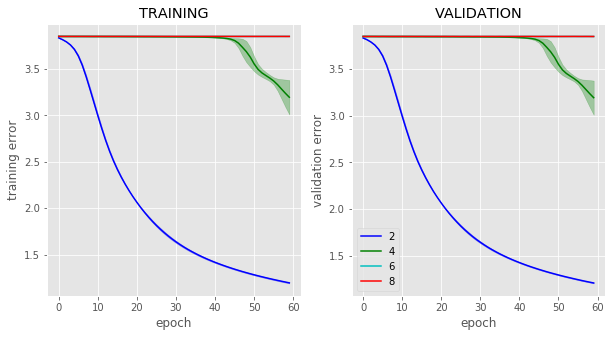

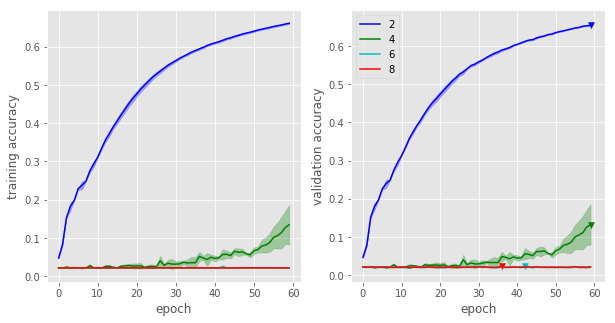

In [11]:
fig1_sigmoid,fig2_sigmoid, ax11_sigmoid,ax12_sigmoid,ax21_sigmoid,ax22_sigmoid =\
    plot_graph_mean_std(mu_rho_sigmoid, best_epochs_sigmoid)

In [12]:
pprint(best_epochs_sigmoid)

{2: {'idx': 59,
     'mean': 0.65497890295358652,
     'std': 0.001581293645691423,
     'test_acc_mean': 0.64789029535865017,
     'test_acc_std': 0.0018498152081672656},
 4: {'idx': 59,
     'mean': 0.13257383966244729,
     'std': 0.053502400869710504,
     'test_acc_mean': 0.13040084388185649,
     'test_acc_std': 0.049951488866777874},
 6: {'idx': 42,
     'mean': 0.024135021097046381,
     'std': 0.0043868668904462572,
     'test_acc_mean': 0.024029535864978871,
     'test_acc_std': 0.0053240686233881557},
 8: {'idx': 36,
     'mean': 0.022616033755274229,
     'std': 0.00032819302080388521,
     'test_acc_mean': 0.020316455696202506,
     'test_acc_std': 0.0015216221873634557}}


In [13]:
wilcoxonTest(sigmoid)

8 6 WilcoxonResult(statistic=844.5, pvalue=0.60375948520419487)


[(4, 2, WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 (6, 2, WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 (6, 4, WilcoxonResult(statistic=39.0, pvalue=1.1276582719676042e-10)),
 (8, 2, WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 (8, 4, WilcoxonResult(statistic=35.0, pvalue=9.2803227172074842e-11)),
 (8, 6, WilcoxonResult(statistic=844.5, pvalue=0.60375948520419487))]

### `ReLU` Activation function

In [14]:
mu_rho_relu = generate_mean_std(relu)
best_epochs_relu = analyse_mean_std(mu_rho_relu)

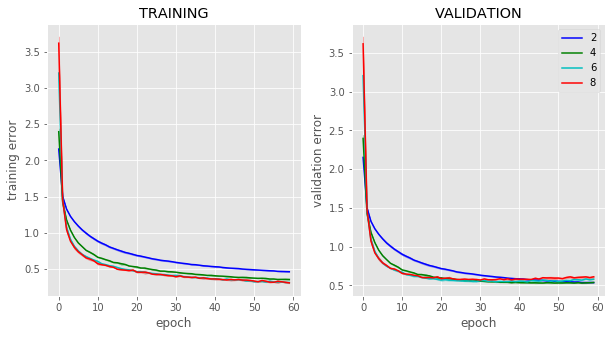

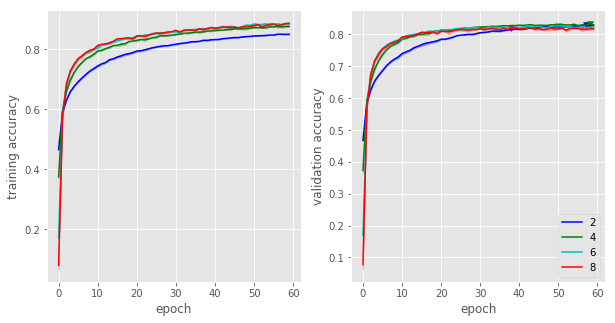

In [15]:
fig1_relu,fig2_relu, ax11_relu,ax12_relu,ax21_relu,ax22_relu =\
    plot_graph_mean_std(mu_rho_relu, best_epochs_relu)

In [16]:
pprint(best_epochs_relu)

{2: {'idx': 57,
     'mean': 0.82805907172995763,
     'std': 0.00090741827711404678,
     'test_acc_mean': 0.81573839662447245,
     'test_acc_std': 0.00097275458931629622},
 4: {'idx': 58,
     'mean': 0.83154008438818527,
     'std': 0.00058769570789780846,
     'test_acc_mean': 0.82080168776371287,
     'test_acc_std': 0.0014764918318080048},
 6: {'idx': 50,
     'mean': 0.82651898734177198,
     'std': 0.0042522979828453836,
     'test_acc_mean': 0.8165822784810125,
     'test_acc_std': 0.0029474016014778733},
 8: {'idx': 38,
     'mean': 0.82035864978902928,
     'std': 0.0031798505273034424,
     'test_acc_mean': 0.80852320675105493,
     'test_acc_std': 0.0011833167647577907}}


In [17]:
wilcoxonTest(relu)

6 4 WilcoxonResult(statistic=731.0, pvalue=0.17556577014041042)


[(4, 2, WilcoxonResult(statistic=60.0, pvalue=3.0900539178971929e-10)),
 (6, 2, WilcoxonResult(statistic=190.0, pvalue=9.4412587826474939e-08)),
 (6, 4, WilcoxonResult(statistic=731.0, pvalue=0.17556577014041042)),
 (8, 2, WilcoxonResult(statistic=388.0, pvalue=0.00010464352972318071)),
 (8, 4, WilcoxonResult(statistic=413.0, pvalue=0.00021943313920820174)),
 (8, 6, WilcoxonResult(statistic=69.0, pvalue=4.7261632279787278e-10))]

### `ELU` Activation Function

In [18]:
mu_rho_elu = generate_mean_std(elu)
best_epochs_elu = analyse_mean_std(mu_rho_elu)

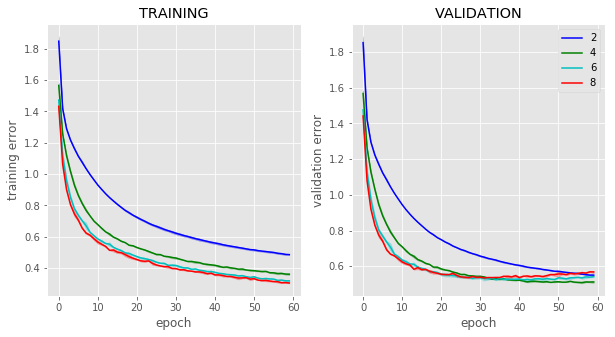

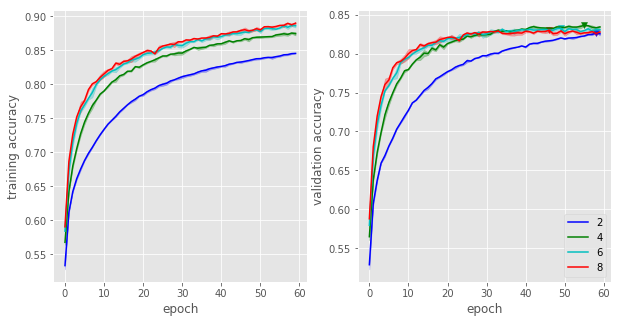

In [19]:
fig1_elu, fig2_elu, ax11_elu, ax12_elu, ax21_elu, ax22_elu = plot_graph_mean_std(
    mu_rho_elu, best_epochs_elu)

In [20]:
pprint(best_epochs_elu)

{2: {'idx': 58,
     'mean': 0.82647679324894474,
     'std': 0.00014917864581973818,
     'test_acc_mean': 0.81375527426160321,
     'test_acc_std': 0.0026255441664313176},
 4: {'idx': 55,
     'mean': 0.83639240506329093,
     'std': 0.0010166062281143932,
     'test_acc_mean': 0.82565400843881853,
     'test_acc_std': 0.00041770020829607816},
 6: {'idx': 49,
     'mean': 0.83270042194092786,
     'std': 0.0016906620683248303,
     'test_acc_mean': 0.8244303797468352,
     'test_acc_std': 0.0017592963493154156},
 8: {'idx': 46,
     'mean': 0.83018987341772144,
     'std': 0.0027679775132697874,
     'test_acc_mean': 0.81875527426160311,
     'test_acc_std': 0.001687499979394049}}


In [21]:
wilcoxonTest(relu)

6 4 WilcoxonResult(statistic=731.0, pvalue=0.17556577014041042)


[(4, 2, WilcoxonResult(statistic=60.0, pvalue=3.0900539178971929e-10)),
 (6, 2, WilcoxonResult(statistic=190.0, pvalue=9.4412587826474939e-08)),
 (6, 4, WilcoxonResult(statistic=731.0, pvalue=0.17556577014041042)),
 (8, 2, WilcoxonResult(statistic=388.0, pvalue=0.00010464352972318071)),
 (8, 4, WilcoxonResult(statistic=413.0, pvalue=0.00021943313920820174)),
 (8, 6, WilcoxonResult(statistic=69.0, pvalue=4.7261632279787278e-10))]

### `SELU` Activation Function

In [22]:
mu_rho_selu = generate_mean_std(selu)
best_epochs_selu = analyse_mean_std(mu_rho_selu)

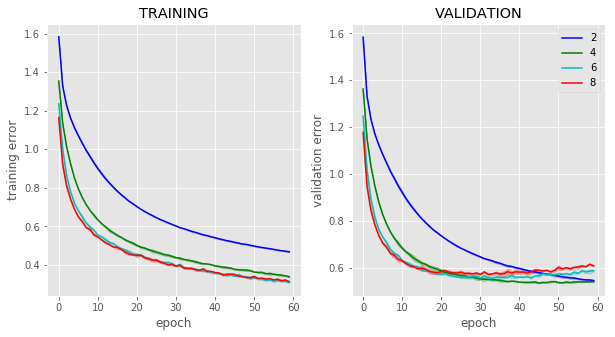

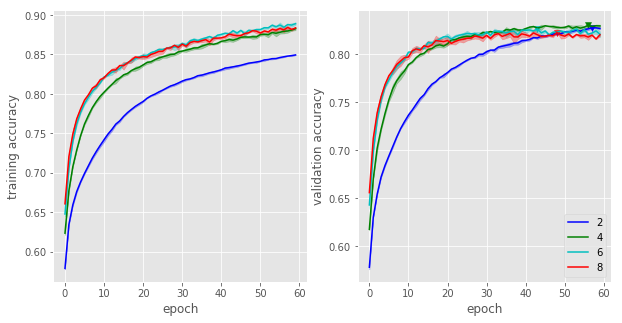

In [23]:
fig1_selu, fig2_selu, ax11_selu, ax12_selu, ax21_selu, ax22_selu = plot_graph_mean_std(
    mu_rho_selu, best_epochs_selu)

In [24]:
pprint(best_epochs_selu)

{2: {'idx': 57,
     'mean': 0.82719409282700418,
     'std': 0.0010966406260225598,
     'test_acc_mean': 0.81348101265822736,
     'test_acc_std': 0.00013672448730816288},
 4: {'idx': 56,
     'mean': 0.82966244725738425,
     'std': 0.0016635927429296364,
     'test_acc_mean': 0.82078059071729914,
     'test_acc_std': 0.0013419446323872225},
 6: {'idx': 43,
     'mean': 0.82582278481012661,
     'std': 0.0031776102096127221,
     'test_acc_mean': 0.81559071729957788,
     'test_acc_std': 0.00091035649832855038},
 8: {'idx': 48,
     'mean': 0.8221097046413498,
     'std': 0.00013005092833261108,
     'test_acc_mean': 0.81147679324894506,
     'test_acc_std': 0.0027628271843264992}}


In [25]:
wilcoxonTest(selu)

6 4 WilcoxonResult(statistic=697.0, pvalue=0.10853014544004878)
8 4 WilcoxonResult(statistic=818.0, pvalue=0.47517900472774421)


[(4, 2, WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 (6, 2, WilcoxonResult(statistic=70.0, pvalue=4.9540083155152307e-10)),
 (6, 4, WilcoxonResult(statistic=697.0, pvalue=0.10853014544004878)),
 (8, 2, WilcoxonResult(statistic=177.0, pvalue=5.5456980565433018e-08)),
 (8, 4, WilcoxonResult(statistic=818.0, pvalue=0.47517900472774421)),
 (8, 6, WilcoxonResult(statistic=356.0, pvalue=3.8692768109649691e-05))]

BEST AT FOUR HIDDEN LAYERS

## Comparing activation function's performance at fixed depth

In [26]:
two = {}
four = {}
six = {}
eight = {}

In [27]:
for depth, store in {2:two, 4:four, 6:six, 8:eight}.items():
    for func, data in {
            'relu': mu_rho_relu,
            'elu': mu_rho_elu,
            'sigmoid': mu_rho_sigmoid,
            'selu': mu_rho_selu
    }.items():
        store[func] = data[int(depth)]

### `2` hidden layers

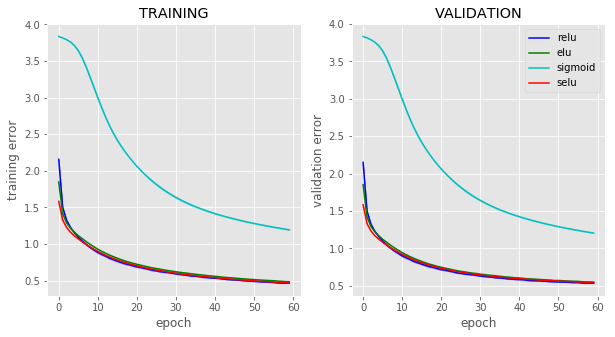

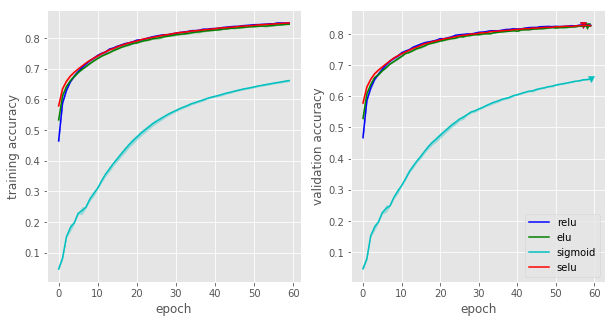

In [28]:
best_epoch_two = analyse_mean_std(two)
fig1_two, fig2_two, ax11_two, ax12_two, ax21_two, ax22_two = plot_graph_mean_std(
    two, best_epoch_two)

In [29]:
pprint(best_epoch_two)

{'elu': {'idx': 58,
         'mean': 0.82647679324894474,
         'std': 0.00014917864581973818,
         'test_acc_mean': 0.81375527426160321,
         'test_acc_std': 0.0026255441664313176},
 'relu': {'idx': 57,
          'mean': 0.82805907172995763,
          'std': 0.00090741827711404678,
          'test_acc_mean': 0.81573839662447245,
          'test_acc_std': 0.00097275458931629622},
 'selu': {'idx': 57,
          'mean': 0.82719409282700418,
          'std': 0.0010966406260225598,
          'test_acc_mean': 0.81348101265822736,
          'test_acc_std': 0.00013672448730816288},
 'sigmoid': {'idx': 59,
             'mean': 0.65497890295358652,
             'std': 0.001581293645691423,
             'test_acc_mean': 0.64789029535865017,
             'test_acc_std': 0.0018498152081672656}}


In [30]:
wilcoxonTest(two)

[('elu',
  'relu',
  WilcoxonResult(statistic=205.0, pvalue=1.7252657716459867e-07)),
 ('sigmoid',
  'relu',
  WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 ('sigmoid',
  'elu',
  WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 ('selu',
  'relu',
  WilcoxonResult(statistic=424.0, pvalue=0.00030084471496084496)),
 ('selu', 'elu', WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 ('selu',
  'sigmoid',
  WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11))]

### `4` hidden layers

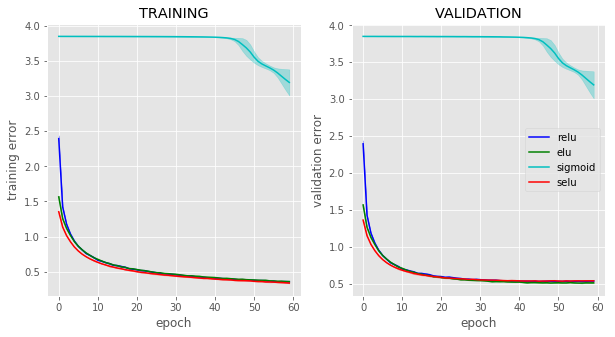

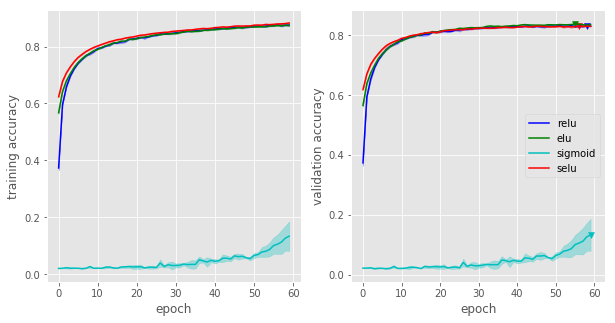

In [31]:
best_epoch_four = analyse_mean_std(four)
fig1_four, fig2_four, ax11_four, ax12_four, ax21_four, ax22_four = plot_graph_mean_std(
    four, best_epoch_four)

In [32]:
pprint(best_epoch_four)

{'elu': {'idx': 55,
         'mean': 0.83639240506329093,
         'std': 0.0010166062281143932,
         'test_acc_mean': 0.82565400843881853,
         'test_acc_std': 0.00041770020829607816},
 'relu': {'idx': 58,
          'mean': 0.83154008438818527,
          'std': 0.00058769570789780846,
          'test_acc_mean': 0.82080168776371287,
          'test_acc_std': 0.0014764918318080048},
 'selu': {'idx': 56,
          'mean': 0.82966244725738425,
          'std': 0.0016635927429296364,
          'test_acc_mean': 0.82078059071729914,
          'test_acc_std': 0.0013419446323872225},
 'sigmoid': {'idx': 59,
             'mean': 0.13257383966244729,
             'std': 0.053502400869710504,
             'test_acc_mean': 0.13040084388185649,
             'test_acc_std': 0.049951488866777874}}


In [33]:
wilcoxonTest(four)

selu elu WilcoxonResult(statistic=694.0, pvalue=0.10375413770846378)


[('elu', 'relu', WilcoxonResult(statistic=77.0, pvalue=6.871309662948847e-10)),
 ('sigmoid',
  'relu',
  WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 ('sigmoid',
  'elu',
  WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 ('selu',
  'relu',
  WilcoxonResult(statistic=641.0, pvalue=0.043687246543404161)),
 ('selu', 'elu', WilcoxonResult(statistic=694.0, pvalue=0.10375413770846378)),
 ('selu',
  'sigmoid',
  WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11))]

### `6` hidden layers

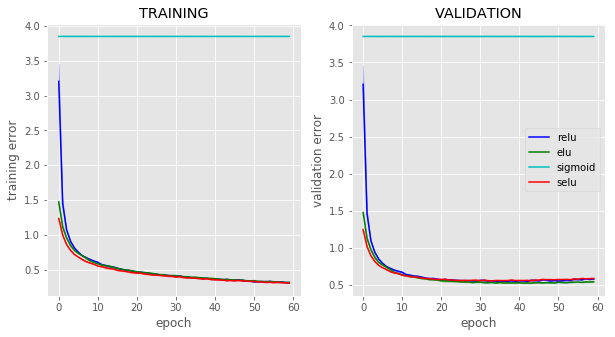

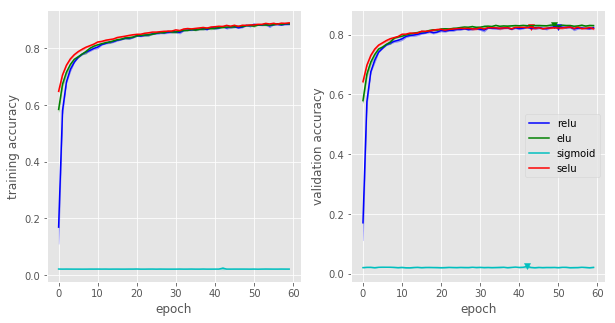

In [34]:
best_epoch_six = analyse_mean_std(six)
fig1_six, fig2_six, ax11_six, ax12_six, ax21_six, ax22_six = plot_graph_mean_std(
    six, best_epoch_six)

In [35]:
pprint(best_epoch_six)

{'elu': {'idx': 49,
         'mean': 0.83270042194092786,
         'std': 0.0016906620683248303,
         'test_acc_mean': 0.8244303797468352,
         'test_acc_std': 0.0017592963493154156},
 'relu': {'idx': 50,
          'mean': 0.82651898734177198,
          'std': 0.0042522979828453836,
          'test_acc_mean': 0.8165822784810125,
          'test_acc_std': 0.0029474016014778733},
 'selu': {'idx': 43,
          'mean': 0.82582278481012661,
          'std': 0.0031776102096127221,
          'test_acc_mean': 0.81559071729957788,
          'test_acc_std': 0.00091035649832855038},
 'sigmoid': {'idx': 42,
             'mean': 0.024135021097046381,
             'std': 0.0043868668904462572,
             'test_acc_mean': 0.024029535864978871,
             'test_acc_std': 0.0053240686233881557}}


In [36]:
wilcoxonTest(six)

[('elu', 'relu', WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 ('sigmoid',
  'relu',
  WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 ('sigmoid',
  'elu',
  WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 ('selu',
  'relu',
  WilcoxonResult(statistic=234.0, pvalue=5.351783107030353e-07)),
 ('selu',
  'elu',
  WilcoxonResult(statistic=554.0, pvalue=0.0078713556365246472)),
 ('selu',
  'sigmoid',
  WilcoxonResult(statistic=0.0, pvalue=1.6290444152540581e-11))]

### `8` hidden layers

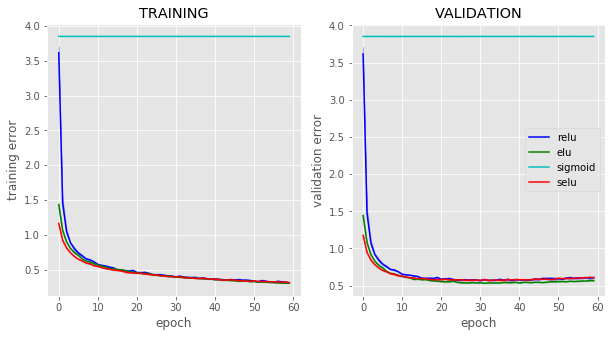

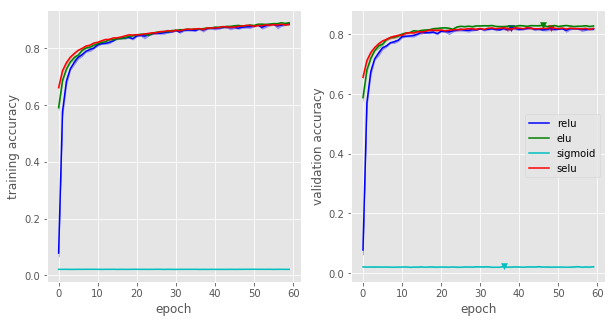

In [37]:
best_epoch_eight = analyse_mean_std(eight)
fig1_eight, fig2_eight, ax11_eight, ax12_eight, ax21_eight, ax22_eight = plot_graph_mean_std(
    eight, best_epoch_eight)

In [38]:
pprint(best_epoch_eight)

{'elu': {'idx': 46,
         'mean': 0.83018987341772144,
         'std': 0.0027679775132697874,
         'test_acc_mean': 0.81875527426160311,
         'test_acc_std': 0.001687499979394049},
 'relu': {'idx': 38,
          'mean': 0.82035864978902928,
          'std': 0.0031798505273034424,
          'test_acc_mean': 0.80852320675105493,
          'test_acc_std': 0.0011833167647577907},
 'selu': {'idx': 48,
          'mean': 0.8221097046413498,
          'std': 0.00013005092833261108,
          'test_acc_mean': 0.81147679324894506,
          'test_acc_std': 0.0027628271843264992},
 'sigmoid': {'idx': 36,
             'mean': 0.022616033755274229,
             'std': 0.00032819302080388521,
             'test_acc_mean': 0.020316455696202506,
             'test_acc_std': 0.0015216221873634557}}


In [39]:
wilcoxonTest(eight)

[('elu', 'relu', WilcoxonResult(statistic=0.0, pvalue=1.6282776218416573e-11)),
 ('sigmoid',
  'relu',
  WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 ('sigmoid',
  'elu',
  WilcoxonResult(statistic=0.0, pvalue=1.6295557943119345e-11)),
 ('selu',
  'relu',
  WilcoxonResult(statistic=38.0, pvalue=1.0741730388842177e-10)),
 ('selu',
  'elu',
  WilcoxonResult(statistic=334.0, pvalue=1.8935112098172874e-05)),
 ('selu',
  'sigmoid',
  WilcoxonResult(statistic=0.0, pvalue=1.6293000864348577e-11))]

## Number of hidden units

In this experiment, we use our best-performing activation function (in the previous experiment) - 4 hidden layers with ELU layer - to find the optimum number of hidden unit.

I use the same experiment setup as before, **varying the number of hidden nodes:[100, 200, 400, 500].**

### `4` hidden layers

In [195]:
expt_data = {}
for i in range(1,4):
    name = './03_NumHiddenUnitsExpt/experiment_units_elu_4layer_{}.pkl'.format(i)
    expt_data[i] = pkl.load(open(name, 'rb'))

In [196]:
hidden_units = [100, 200, 400, 500]
hidden_units_stats = {a: dict() for a in hidden_units}

# Iterate through each of the test stats:
for i in range(1, 4):
    _expt_data = expt_data[i]

    # Iterate through each hidden layer experiment:
    for num_units in _expt_data.keys():
        model, stats, keys, run_time = expt_data[i][num_units]
        if i == 1:
            hidden_units_stats[num_units]['val_err'] = []
            hidden_units_stats[num_units]['val_acc'] = []
            hidden_units_stats[num_units]['train_err'] = []
            hidden_units_stats[num_units]['train_acc'] = []
            hidden_units_stats[num_units]['test_acc'] = []
        hidden_units_stats[num_units]['val_err'].append(
            stats[1:, keys['error(valid)']])
        hidden_units_stats[num_units]['val_acc'].append(
            stats[1:, keys['acc(valid)']])
        hidden_units_stats[num_units]['train_err'].append(
            stats[1:, keys['error(train)']])
        hidden_units_stats[num_units]['train_acc'].append(
            stats[1:, keys['acc(train)']])
        hidden_units_stats[num_units]['test_acc'].append(
            stats[1:, keys['acc(test)']])

In [197]:
hidden_units_stats_mu_rho = generate_mean_std(hidden_units_stats)
best_epochs = analyse_mean_std(hidden_units_stats_mu_rho)

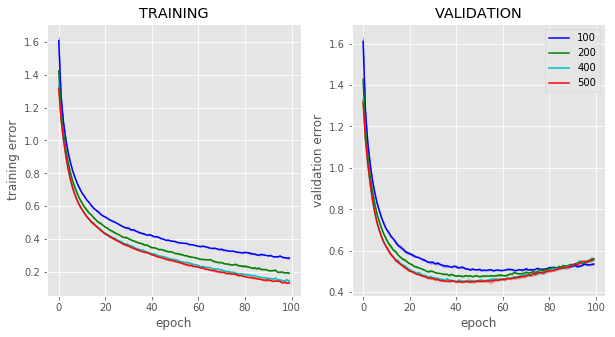

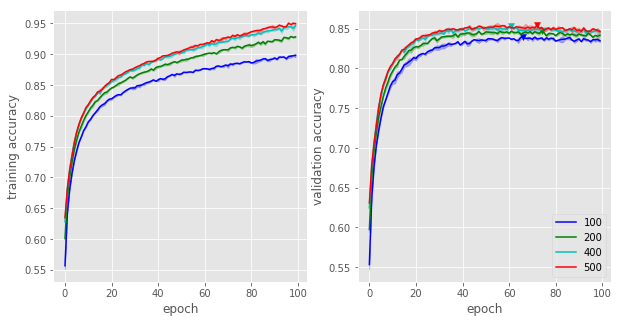

In [198]:
fig1, fig2, ax11, ax12, ax21, ax22 = plot_graph_mean_std(
    hidden_units_stats_mu_rho, best_epochs)

In [ ]:
ax11

In [199]:
pprint(best_epochs)

{100: {'idx': 66,
       'mean': 0.83943037974683532,
       'std': 0.0013366273469582865,
       'test_acc_mean': 0.82698312236286908,
       'test_acc_std': 0.0012974254735460824},
 200: {'idx': 74,
       'mean': 0.84740506329113907,
       'std': 0.00096540600748067909,
       'test_acc_mean': 0.83708860759493653,
       'test_acc_std': 0.0013426078123795801},
 400: {'idx': 61,
       'mean': 0.85308016877637138,
       'std': 0.0012682817185813143,
       'test_acc_mean': 0.84213080168776366,
       'test_acc_std': 0.0014628637825622054},
 500: {'idx': 72,
       'mean': 0.85424050632911397,
       'std': 0.0018086949577512433,
       'test_acc_mean': 0.84402953586497897,
       'test_acc_std': 0.0013117545617476153}}


In [45]:
wilcoxonTest(hidden_units_stats)

[(200, 100, WilcoxonResult(statistic=0.0, pvalue=3.8959004580134337e-18)),
 (400, 100, WilcoxonResult(statistic=0.0, pvalue=3.8961202419540079e-18)),
 (400, 200, WilcoxonResult(statistic=0.0, pvalue=3.8961202419540079e-18)),
 (500, 100, WilcoxonResult(statistic=0.0, pvalue=3.896340037647931e-18)),
 (500, 200, WilcoxonResult(statistic=0.0, pvalue=3.8954609253898387e-18)),
 (500, 400, WilcoxonResult(statistic=481.5, pvalue=2.1219283791828931e-12))]

Choose 400 hidden units, as faster convergence; marginal improvement from 500.

### `9` hidden layers

In [46]:
expt_data = {}
for i in range(1,4):
    name = './03_NumHiddenUnitsExpt/experiment_units_elu{}_9layer.pkl'.format(i)
    expt_data[i] = pkl.load(open(name, 'rb'))

In [47]:

hidden_units = [100, 200, 300, 400, 500, 600, 700]
hidden_units_stats_9layer = {a: dict() for a in hidden_units}

# Iterate through each of the test stats:
for i in range(1, 4):
    _expt_data = expt_data[i]

    # Iterate through each hidden layer experiment:
    for num_units in _expt_data.keys():
        stats, keys, run_time, _ = expt_data[i][num_units]
        if i == 1:
            hidden_units_stats_9layer[num_units]['val_err'] = []
            hidden_units_stats_9layer[num_units]['val_acc'] = []
            hidden_units_stats_9layer[num_units]['train_err'] = []
            hidden_units_stats_9layer[num_units]['train_acc'] = []
            hidden_units_stats_9layer[num_units]['test_acc'] = []
        hidden_units_stats_9layer[num_units]['val_err'].append(
            stats[1:, keys['error(valid)']])
        hidden_units_stats_9layer[num_units]['val_acc'].append(
            stats[1:, keys['acc(valid)']])
        hidden_units_stats_9layer[num_units]['train_err'].append(
            stats[1:, keys['error(train)']])
        hidden_units_stats_9layer[num_units]['train_acc'].append(
            stats[1:, keys['acc(train)']])
        hidden_units_stats_9layer[num_units]['test_acc'].append(
            stats[1:, keys['acc(test)']])

In [48]:
hidden_units_9_stats_mu_rho = generate_mean_std(hidden_units_stats_9layer)
best_epochs = analyse_mean_std(hidden_units_9_stats_mu_rho)

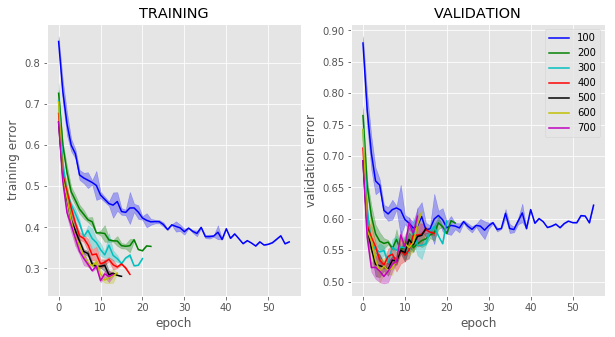

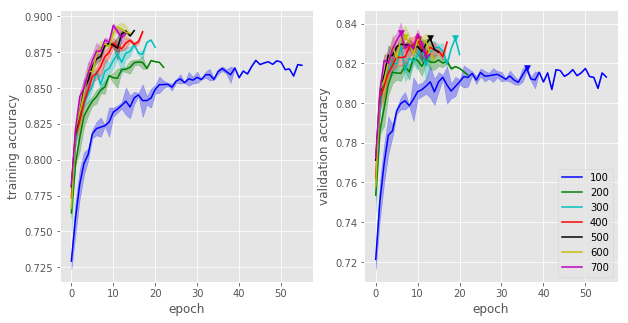

In [49]:
fig1, fig2, ax11, ax12, ax21, ax22 = plot_graph_mean_std(
    hidden_units_9_stats_mu_rho, best_epochs)

In [50]:
pprint(best_epochs)

{100: {'idx': 36,
       'mean': 0.81749999999999967,
       'std': 0.0014873417721517068,
       'test_acc_mean': 0.80803797468354421,
       'test_acc_std': 0.0027215189873416312},
 200: {'idx': 12,
       'mean': 0.82267932489451467,
       'std': 0.0026397455391758344,
       'test_acc_mean': 0.81196202531645556,
       'test_acc_std': 0.00193633652414905},
 300: {'idx': 19,
       'mean': 0.83265822784810128,
       'std': 0.0,
       'test_acc_mean': 0.82069620253164566,
       'test_acc_std': 0.0},
 400: {'idx': 10,
       'mean': 0.8320675105485229,
       'std': 0.0034840160933913805,
       'test_acc_mean': 0.82130801687763677,
       'test_acc_std': 0.0037108019478002663},
 500: {'idx': 13,
       'mean': 0.83253164556962034,
       'std': 0.0,
       'test_acc_mean': 0.81917721518987341,
       'test_acc_std': 0.0},
 600: {'idx': 7,
       'mean': 0.83312236286919827,
       'std': 0.0059946061080775352,
       'test_acc_mean': 0.82405063291139224,
       'test_acc_std': 0.

### Visualising the activation function at each hidden layer

    OUR BASELINE MODEL
    ELU
    4 HIDDEN LAYER
    400 UNITS EACH

## Initialisation (`He` ***vs*** `Glorot`)

In this experiment, I hypothesised that the weights initialisation method will impact the validation accuracy, and that the `He` initialisation [1] performs better than `Glorot` [2], as explained in [1]

Setup:

    ELULayer
    4 Hidden Layer
    400 hidden units each
    
Varying: Weight initialisation methods: 
1. HeInit = $\text{Gaussian}(0, {\sqrt\frac{2}{n_{in}}})$
2. GlorotUniformInit = $\text{Uniform}(-\sqrt{\frac{6}{n_{in} + n_{out}}}, \sqrt{\frac{6}{n_{in} + n_{out}}} )$

[1] 
[2] 

In [51]:
expt_data = {}
for i in range(1,4):
    name = './04_initialisers/he_vs_glorot_{}.pkl'.format(i)
    expt_data[i] = pkl.load(open(name, 'rb'))

In [52]:
labels = ['he','glorot']
he_vs_glorot_stats = {a: dict() for a in labels}

# Iterate through each of the test stats:
for i in range(1, 4):
    # Iterate through each hidden layer experiment:
    for num_units in expt_data[i].keys():
        model, stats, keys, run_time = expt_data[i][num_units]
        if i == 1:
            he_vs_glorot_stats[num_units]['val_err'] = []
            he_vs_glorot_stats[num_units]['val_acc'] = []
            he_vs_glorot_stats[num_units]['train_err'] = []
            he_vs_glorot_stats[num_units]['train_acc'] = []
            he_vs_glorot_stats[num_units]['test_acc'] = []
        he_vs_glorot_stats[num_units]['val_err'].append(
            stats[1:, keys['error(valid)']])
        he_vs_glorot_stats[num_units]['val_acc'].append(
            stats[1:, keys['acc(valid)']])
        he_vs_glorot_stats[num_units]['train_err'].append(
            stats[1:, keys['error(train)']])
        he_vs_glorot_stats[num_units]['train_acc'].append(
            stats[1:, keys['acc(train)']])
        he_vs_glorot_stats[num_units]['test_acc'].append(
            stats[1:, keys['acc(test)']])

In [53]:
he_vs_glorot_mu_rho = generate_mean_std(he_vs_glorot_stats)
best_epochs = analyse_mean_std(he_vs_glorot_mu_rho)

In [54]:
pprint(best_epochs)

{'glorot': {'idx': 55,
            'mean': 0.85451476793248926,
            'std': 0.0014746820352151027,
            'test_acc_mean': 0.84236286919831238,
            'test_acc_std': 0.00084018176167669693},
 'he': {'idx': 43,
        'mean': 0.84835443037974667,
        'std': 0.0021035776007617829,
        'test_acc_mean': 0.83909282700421939,
        'test_acc_std': 0.0014837089428285303}}


In [55]:
wilcoxonTest(he_vs_glorot_stats)

glorot he WilcoxonResult(statistic=2000.0, pvalue=0.071055821095137681)


[('glorot',
  'he',
  WilcoxonResult(statistic=2000.0, pvalue=0.071055821095137681))]

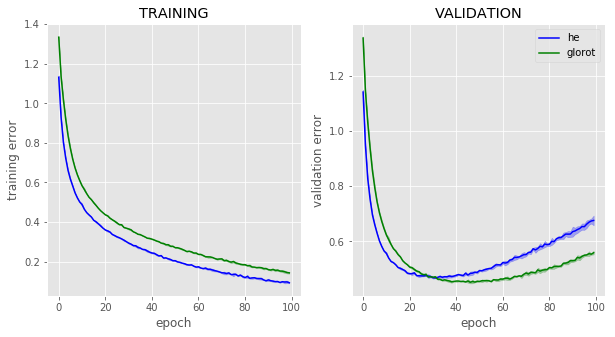

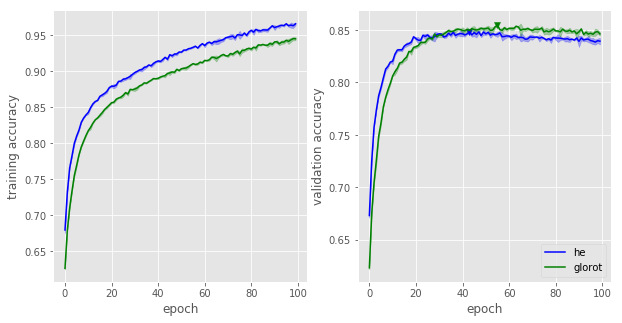

In [56]:
fig1, fig2, ax11, ax12, ax21, ax22 = plot_graph_mean_std(
    he_vs_glorot_mu_rho, best_epochs)

Converges faster, but so what?

# Regularisers

## `L1/L2` Norm

In this set of experiments, we compare the L1/L2 regularisations for weights in an affine layer

In [57]:
expt_data = {}
for i in range(1,4): ## TO CHANGE LATER
    name = './05_Regularisers/LNorm12_{}.pkl'.format(i)
    expt_data[i] = pkl.load(open(name, 'rb'))

In [58]:
labels = ["L1(1e-5)","L1(1e-3)","L2(1e-4)","L2(1e-2)"]
LNorm12_stats = {a: dict() for a in labels}

# Iterate through each of the test stats:
for i in range(1, 4):
    # Iterate through each hidden layer experiment:
    for label in expt_data[i].keys():
        model, stats, keys, run_time = expt_data[i][label]
        if i == 1:
            LNorm12_stats[label]['val_err'] = []
            LNorm12_stats[label]['val_acc'] = []
            LNorm12_stats[label]['train_err'] = []
            LNorm12_stats[label]['train_acc'] = []
            LNorm12_stats[label]['test_acc'] = []
        LNorm12_stats[label]['val_err'].append(
            stats[1:, keys['error(valid)']])
        LNorm12_stats[label]['val_acc'].append(
            stats[1:, keys['acc(valid)']])
        LNorm12_stats[label]['train_err'].append(
            stats[1:, keys['error(train)']])
        LNorm12_stats[label]['train_acc'].append(
            stats[1:, keys['acc(train)']])
        LNorm12_stats[label]['test_acc'].append(
            stats[1:, keys['acc(test)']])

In [59]:
LNorm_mu_rho = generate_mean_std(LNorm12_stats)
best_epochs = analyse_mean_std(LNorm_mu_rho)

In [60]:
pprint(best_epochs)

{'L1(1e-3)': {'idx': 92,
              'mean': 0.72362869198312252,
              'std': 0.0045804403769999285,
              'test_acc_mean': 0.71483122362869189,
              'test_acc_std': 0.0031486237426653456},
 'L1(1e-5)': {'idx': 70,
              'mean': 0.85672995780590711,
              'std': 0.0013339607560792412,
              'test_acc_mean': 0.8451265822784807,
              'test_acc_std': 0.0014950647862047284},
 'L2(1e-2)': {'idx': 98,
              'mean': 0.73497890295358648,
              'std': 0.0041837097362660896,
              'test_acc_mean': 0.72411392405063291,
              'test_acc_std': 0.00229657606087319},
 'L2(1e-4)': {'idx': 64,
              'mean': 0.85542194092826984,
              'std': 0.0017095117788932933,
              'test_acc_mean': 0.8458438818565398,
              'test_acc_std': 0.0013955979247714568}}


In [61]:
wilcoxonTest(LNorm12_stats)

L2(1e-4) L1(1e-5) WilcoxonResult(statistic=2254.0, pvalue=0.35144604672817459)


[('L1(1e-3)',
  'L1(1e-5)',
  WilcoxonResult(statistic=0.0, pvalue=3.896340037647931e-18)),
 ('L2(1e-4)',
  'L1(1e-5)',
  WilcoxonResult(statistic=2254.0, pvalue=0.35144604672817459)),
 ('L2(1e-4)',
  'L1(1e-3)',
  WilcoxonResult(statistic=0.0, pvalue=3.8965598450959092e-18)),
 ('L2(1e-2)',
  'L1(1e-5)',
  WilcoxonResult(statistic=0.0, pvalue=3.8961202419540079e-18)),
 ('L2(1e-2)',
  'L1(1e-3)',
  WilcoxonResult(statistic=0.0, pvalue=3.8965598450959092e-18)),
 ('L2(1e-2)',
  'L2(1e-4)',
  WilcoxonResult(statistic=0.0, pvalue=3.8965598450959092e-18))]

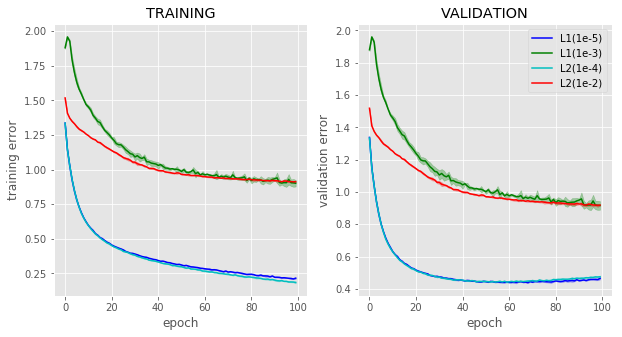

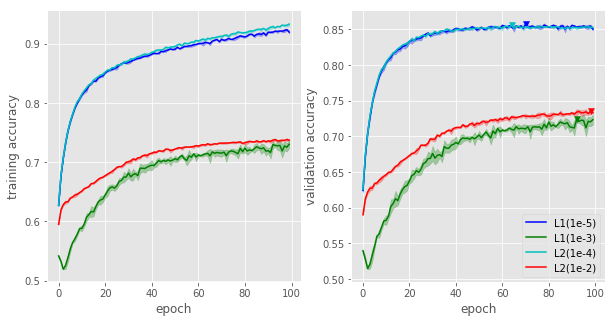

In [62]:
fig1, fig2, ax11, ax12, ax21, ax22 = plot_graph_mean_std(
    LNorm_mu_rho, best_epochs)

Finding an ideal for L2-Norm:

## `DropOut`

In [63]:
expt_data = {}
for i in range(1,4):
    name = './05_Regularisers/dropOut_{}.pkl'.format(i)
    expt_data[i] = pkl.load(open(name, 'rb'))

In [64]:
labels = [.5, .7, .9]
dropOut_stats = {a: dict() for a in labels}

# Iterate through each of the test stats:
for i in range(1, 4):
    # Iterate through each hidden layer experiment:
    for label in expt_data[i].keys():
        model, stats, keys, run_time = expt_data[i][label]
        if i == 1:
            dropOut_stats[label]['val_err'] = []
            dropOut_stats[label]['val_acc'] = []
            dropOut_stats[label]['train_err'] = []
            dropOut_stats[label]['train_acc'] = []
            dropOut_stats[label]['test_acc'] = []
        dropOut_stats[label]['val_err'].append(stats[1:, keys['error(valid)']])
        dropOut_stats[label]['val_acc'].append(stats[1:, keys['acc(valid)']])
        dropOut_stats[label]['train_err'].append(
            stats[1:, keys['error(train)']])
        dropOut_stats[label]['train_acc'].append(stats[1:, keys['acc(train)']])
        dropOut_stats[label]['test_acc'].append(stats[1:, keys['acc(test)']])

In [65]:
dropOut_mu_rho = generate_mean_std(dropOut_stats)
best_epochs = analyse_mean_std(dropOut_mu_rho)

In [66]:
pprint(best_epochs)

{0.5: {'idx': 40,
       'mean': 0.59443037974683544,
       'std': 0.0067130390618975857,
       'test_acc_mean': 0.59113924050632904,
       'test_acc_std': 0.005280924062026059},
 0.7: {'idx': 23,
       'mean': 0.719324894514768,
       'std': 0.0035504517705148455,
       'test_acc_mean': 0.7126793248945148,
       'test_acc_std': 0.0022973511456271605},
 0.9: {'idx': 69,
       'mean': 0.84474683544303808,
       'std': 0.00089507187491999918,
       'test_acc_mean': 0.83386075949367111,
       'test_acc_std': 0.0017006365623474229}}


In [67]:
wilcoxonTest(dropOut_stats)

[(0.7, 0.5, WilcoxonResult(statistic=0.0, pvalue=3.8965598450959092e-18)),
 (0.9, 0.5, WilcoxonResult(statistic=0.0, pvalue=3.8965598450959092e-18)),
 (0.9, 0.7, WilcoxonResult(statistic=0.0, pvalue=3.8965598450959092e-18))]

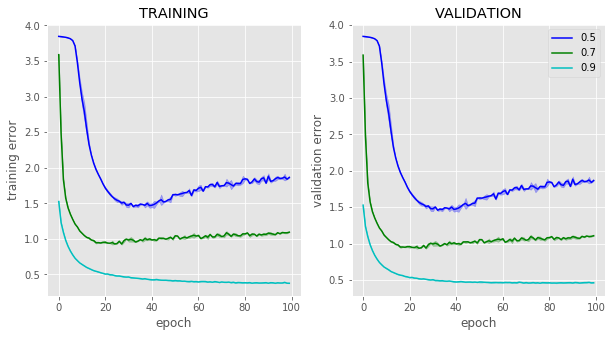

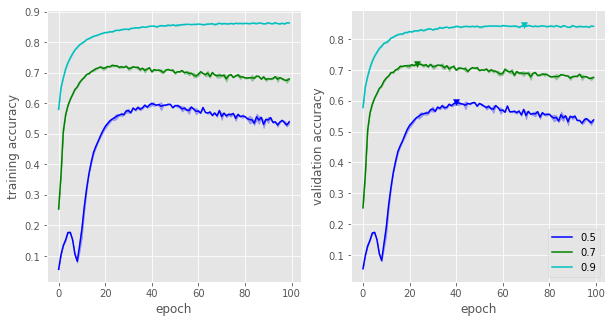

In [68]:
fig1, fig2, ax11, ax12, ax21, ax22 = plot_graph_mean_std(
    dropOut_mu_rho, best_epochs)

## Batch normalisation

In [69]:
expt_data = {}
for i in [2,3]: #range(1,4):
    name = './05_Regularisers/BN_LR_{}.pkl'.format(i)
    expt_data[i] = pkl.load(open(name, 'rb'))

In [82]:
labels = [.01, .05, .1,.5, 1]
BN_stats = {a: dict() for a in labels}

In [84]:
# Iterate through each of the test stats:
for i in [2]:#range(1, 4):
    # Iterate through each hidden layer experiment:
    for label in expt_data[i].keys():
        model, stats, keys, run_time = expt_data[i][label]
        if i == 2:
            BN_stats[label]['val_err'] = []
            BN_stats[label]['val_acc'] = []
            BN_stats[label]['train_err'] = []
            BN_stats[label]['train_acc'] = []
            BN_stats[label]['test_acc'] = []
        BN_stats[label]['val_err'].append(stats[1:, keys['error(valid)']])
        BN_stats[label]['val_acc'].append(stats[1:, keys['acc(valid)']])
        BN_stats[label]['train_err'].append(stats[1:, keys['error(train)']])
        BN_stats[label]['train_acc'].append(stats[1:, keys['acc(train)']])
        BN_stats[label]['test_acc'].append(stats[1:, keys['acc(test)']])

In [85]:
# Iterate through each of the test stats:
for i in [3]:#range(1, 4):
    # Iterate through each hidden layer experiment:
    for label in expt_data[i].keys():
        model, stats, keys, run_time = expt_data[i][label]
        if i == 3:
            BN_stats[label]['val_err'] = []
            BN_stats[label]['val_acc'] = []
            BN_stats[label]['train_err'] = []
            BN_stats[label]['train_acc'] = []
            BN_stats[label]['test_acc'] = []
        BN_stats[label]['val_err'].append(stats[1:, keys['error(valid)']])
        BN_stats[label]['val_acc'].append(stats[1:, keys['acc(valid)']])
        BN_stats[label]['train_err'].append(stats[1:, keys['error(train)']])
        BN_stats[label]['train_acc'].append(stats[1:, keys['acc(train)']])
        BN_stats[label]['test_acc'].append(stats[1:, keys['acc(test)']])

In [86]:
BN_mu_rho = generate_mean_std(BN_stats)
best_epochs = analyse_mean_std(BN_mu_rho)
pprint(best_epochs)

{0.01: {'idx': 0,
        'mean': 0.073164556962025284,
        'std': 0.0,
        'test_acc_mean': 0.076139240506329142,
        'test_acc_std': 0.0},
 0.05: {'idx': 53,
        'mean': 0.23556962025316436,
        'std': 0.0,
        'test_acc_mean': 0.22632911392405047,
        'test_acc_std': 0.0},
 0.1: {'idx': 0,
       'mean': 0.10430379746835441,
       'std': 0.0,
       'test_acc_mean': 0.096835443037974672,
       'test_acc_std': 0.0},
 0.5: {'idx': 43,
       'mean': 0.1860759493670886,
       'std': 0.0,
       'test_acc_mean': 0.18398734177215206,
       'test_acc_std': 0.0},
 1: {'idx': 70,
     'mean': 0.20000000000000007,
     'std': 0.0,
     'test_acc_mean': 0.19436708860759488,
     'test_acc_std': 0.0}}


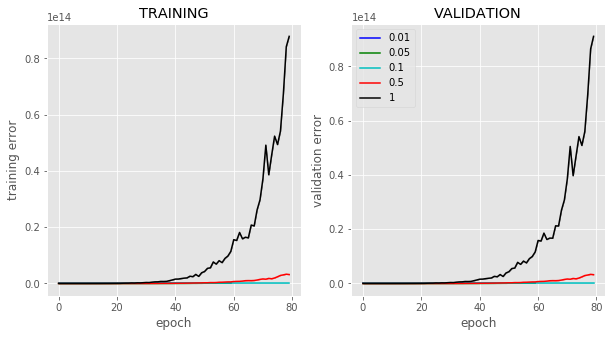

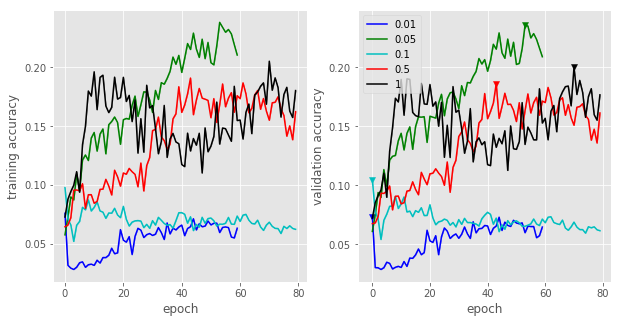

In [87]:
fig1, fig2, ax11, ax12, ax21, ax22 = plot_graph_mean_std(
    BN_mu_rho, best_epochs)

### RELU Units with different `batch_size` (with early stopping)
    
    func = RELU
    batch_sizes = [400,200,100]
    GradientDescentLearningRule(learning_rate=.1)
    400 hidden units
    4 layers

In [114]:
expt_data = {}
for i in [1,2,3]: #range(1,4):
    name = './05_Regularisers/BN_BATCHSIZE_SGD_1e-1_{}.pkl'.format(i)
    expt_data[i] = pkl.load(open(name, 'rb'))

In [115]:
labels = [400,200,100]
BN_stats_RELU = {a: dict() for a in labels}
BN_stats_RELU_model = {a: dict() for a in labels}
# Iterate through each of the test stats:
for i in range(1, 4):
    # Iterate through each hidden layer experiment:
    for label in expt_data[i].keys():
        stats, keys, run_time, best_epoch, best_model, param_stats = expt_data[i][label]
        if i == 1:
            BN_stats_RELU[label]['val_err'] = []
            BN_stats_RELU[label]['val_acc'] = []
            BN_stats_RELU[label]['train_err'] = []
            BN_stats_RELU[label]['train_acc'] = []
            BN_stats_RELU[label]['test_acc'] = []
        BN_stats_RELU[label]['val_err'].append(stats[1:, keys['error(valid)']])
        BN_stats_RELU[label]['val_acc'].append(stats[1:, keys['acc(valid)']])
        BN_stats_RELU[label]['train_err'].append(stats[1:, keys['error(train)']])
        BN_stats_RELU[label]['train_acc'].append(stats[1:, keys['acc(train)']])
        BN_stats_RELU[label]['test_acc'].append(stats[1:, keys['acc(test)']])
        BN_stats_RELU_model[label]['best_model'] = best_model
        BN_stats_RELU_model[label]['idx'] = best_epoch
        BN_stats_RELU_model[label]['param_stats'] = param_stats

In [116]:
BN_RELU_mu_rho = generate_mean_std(BN_stats_RELU)
best_epochs = analyse_mean_std(BN_RELU_mu_rho)
for label in labels:
    idx = BN_stats_RELU_model[label]['idx']
    BN_stats_RELU_model[label]['mean'] = BN_RELU_mu_rho[label]['val_acc']['mean'][idx]

In [117]:
pprint(best_epochs)

{100: {'idx': 17,
       'mean': 0.84434599156118129,
       'std': 0.0022048179930444748,
       'test_acc_mean': 0.83206751054852301,
       'test_acc_std': 0.0012829363540515278},
 200: {'idx': 19,
       'mean': 0.84354430379746825,
       'std': 0.0024022857601385069,
       'test_acc_mean': 0.83373417721518983,
       'test_acc_std': 0.0031010505393288088},
 400: {'idx': 11,
       'mean': 0.83833333333333326,
       'std': 0.0018732870764361512,
       'test_acc_mean': 0.82715811965811958,
       'test_acc_std': 0.0020468256435601517}}


In [168]:
wilcoxonTest(BN_stats_RELU)

100 200 WilcoxonResult(statistic=83.0, pvalue=0.41146474044009396)


[(200, 400, WilcoxonResult(statistic=1.0, pvalue=4.6125380179260302e-05)),
 (100, 400, WilcoxonResult(statistic=3.0, pvalue=0.0001401336206158955)),
 (100, 200, WilcoxonResult(statistic=83.0, pvalue=0.41146474044009396))]

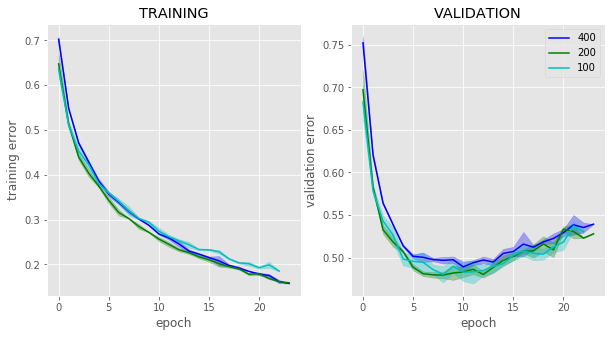

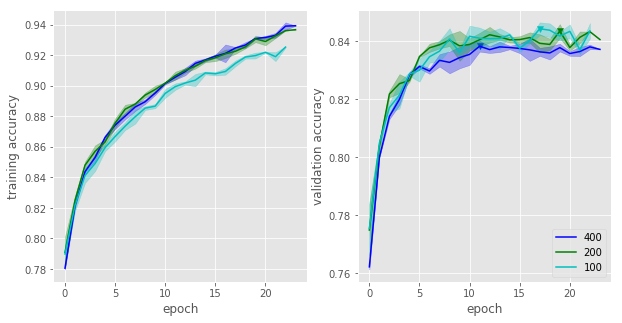

In [122]:
fig1, fig2, ax11, ax12, ax21, ax22 = plot_graph_mean_std(
    BN_RELU_mu_rho, best_epochs)

### ELU Units with different `batch_size` (with early stopping)

In [169]:
expt_data = {}
for i in [1,2,3]: #range(1,4):
    name = './05_Regularisers/BN_BATCHSIZE_SGD_1e-1_ELU_{}.pkl'.format(i)
    expt_data[i] = pkl.load(open(name, 'rb'))

In [170]:
labels = [400,200,100]
BN_stats_ELU = {a: dict() for a in labels}
BN_stats_ELU_model = {a: dict() for a in labels}
# Iterate through each of the test stats:
for i in range(1, 4):
    # Iterate through each hidden layer experiment:
    for label in expt_data[i].keys():
        stats, keys, run_time, best_epoch, best_model, param_stats = expt_data[i][label]
        if i == 1:
            BN_stats_ELU[label]['val_err'] = []
            BN_stats_ELU[label]['val_acc'] = []
            BN_stats_ELU[label]['train_err'] = []
            BN_stats_ELU[label]['train_acc'] = []
            BN_stats_ELU[label]['test_acc'] = []
        BN_stats_ELU[label]['val_err'].append(stats[1:, keys['error(valid)']])
        BN_stats_ELU[label]['val_acc'].append(stats[1:, keys['acc(valid)']])
        BN_stats_ELU[label]['train_err'].append(stats[1:, keys['error(train)']])
        BN_stats_ELU[label]['train_acc'].append(stats[1:, keys['acc(train)']])
        BN_stats_ELU[label]['test_acc'].append(stats[1:, keys['acc(test)']])
        BN_stats_ELU_model[label]['best_model'] = best_model
        BN_stats_ELU_model[label]['idx'] = best_epoch
        BN_stats_ELU_model[label]['param_stats'] = param_stats

In [171]:
BN_ELU_mu_rho = generate_mean_std(BN_stats_ELU)
best_epochs = analyse_mean_std(BN_ELU_mu_rho)
for label in labels:
    idx = BN_stats_ELU_model[label]['idx']
    BN_stats_ELU_model[label]['mean'] = BN_ELU_mu_rho[label]['val_acc']['mean'][idx]

In [172]:
pprint(best_epochs)

{100: {'idx': 20,
       'mean': 0.84691983122362846,
       'std': 0.0022144865268772093,
       'test_acc_mean': 0.83531645569620228,
       'test_acc_std': 0.0021857598983848242},
 200: {'idx': 15,
       'mean': 0.84645569620253169,
       'std': 0.0030589989806569877,
       'test_acc_mean': 0.83594936708860768,
       'test_acc_std': 0.0015503099637866485},
 400: {'idx': 23,
       'mean': 0.84427350427350423,
       'std': 0.0016337422951808052,
       'test_acc_mean': 0.83363247863247869,
       'test_acc_std': 0.0030864051427808735}}


In [173]:
wilcoxonTest(BN_stats_ELU)

100 200 WilcoxonResult(statistic=132.0, pvalue=0.41183950024590854)


[(200, 400, WilcoxonResult(statistic=35.0, pvalue=0.00060217857974925585)),
 (100, 400, WilcoxonResult(statistic=74.0, pvalue=0.017253450258757207)),
 (100, 200, WilcoxonResult(statistic=132.0, pvalue=0.41183950024590854))]

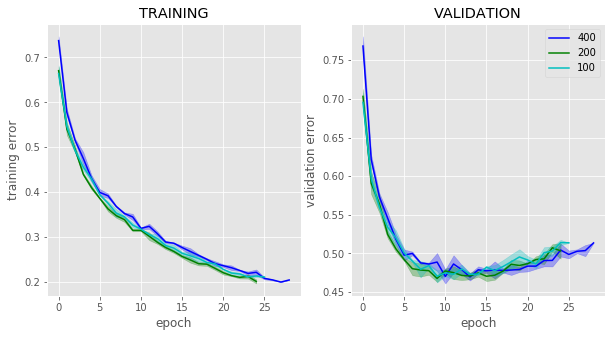

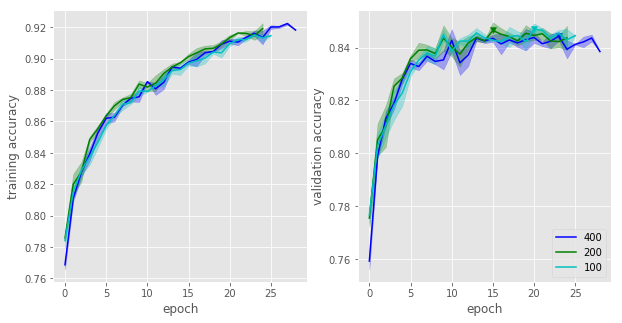

In [174]:
fig1, fig2, ax11, ax12, ax21, ax22 = plot_graph_mean_std(
    BN_ELU_mu_rho, best_epochs)

### L1/L2 Norm + DropOut + BatchNorm

# Learning Rule

We explore the difference between:
1. Stochastic Gradient Descent (vanilla version)
2. RMSProp
3. ADAM

Experiment setup:
    
    learningRules = {
    "RMS":RMSPropLearningRule(),
    "SGD":GradientDescentLearningRule(learning_rate=learning_rate),
    "ADAM":AdamLearningRule()
    }
    func = ELULayer()


In [104]:
expt_data = {}
for i in range(1,4):
    name = './LearningRule/LR_{}.pkl'.format(i)
    expt_data[i] = pkl.load(open(name, 'rb'))

In [105]:
labels = ['SGD', 'RMS', 'ADAM']
LR_stats = {a: dict() for a in labels}

# Iterate through each of the test stats:
for i in range(1, 4):
    # Iterate through each hidden layer experiment:
    for label in expt_data[i].keys():
        model, stats, keys, run_time = expt_data[i][label]
        if i == 1:
            LR_stats[label]['val_err'] = []
            LR_stats[label]['val_acc'] = []
            LR_stats[label]['train_err'] = []
            LR_stats[label]['train_acc'] = []
            LR_stats[label]['test_acc'] = []
        LR_stats[label]['val_err'].append(stats[1:, keys['error(valid)']])
        LR_stats[label]['val_acc'].append(stats[1:, keys['acc(valid)']])
        LR_stats[label]['train_err'].append(
            stats[1:, keys['error(train)']])
        LR_stats[label]['train_acc'].append(stats[1:, keys['acc(train)']])
        LR_stats[label]['test_acc'].append(stats[1:, keys['acc(test)']])

In [106]:
LR_mu_rho = generate_mean_std(LR_stats)
best_epochs = analyse_mean_std(LR_mu_rho)
pprint(best_epochs)

{'ADAM': {'idx': 8,
          'mean': 0.83267932489451457,
          'std': 0.0016311714582342963,
          'test_acc_mean': 0.82213080168776342,
          'test_acc_std': 0.0041342675624439816},
 'RMS': {'idx': 9,
         'mean': 0.83194092827004207,
         'std': 0.0047029854609870886,
         'test_acc_mean': 0.82078059071729947,
         'test_acc_std': 0.0023575890370801352},
 'SGD': {'idx': 66,
         'mean': 0.85369198312236261,
         'std': 0.0012123002446040214,
         'test_acc_mean': 0.84278481012658213,
         'test_acc_std': 0.00041017346192448863}}


In [107]:
wilcoxonTest(LR_stats)

[('RMS',
  'SGD',
  WilcoxonResult(statistic=766.0, pvalue=1.4664276274759544e-09)),
 ('ADAM',
  'SGD',
  WilcoxonResult(statistic=1041.0, pvalue=3.3524169509184445e-07)),
 ('ADAM', 'RMS', WilcoxonResult(statistic=6.0, pvalue=4.6706833078978062e-18))]

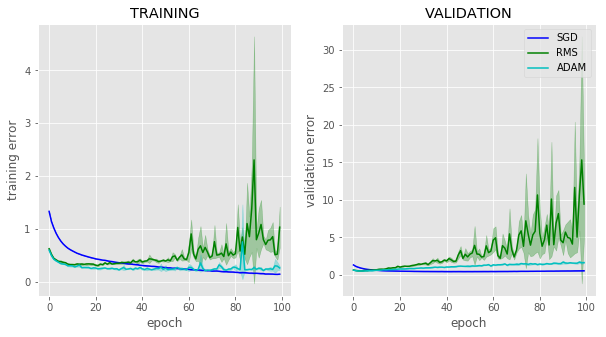

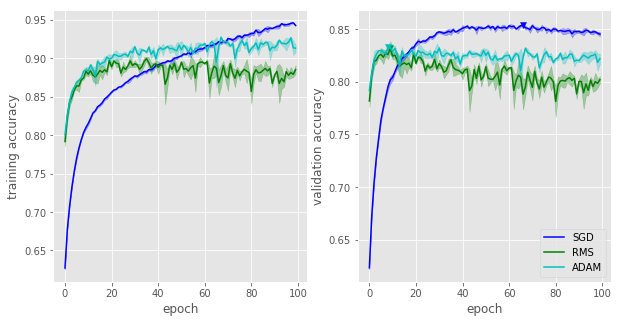

In [108]:
fig1, fig2, ax11, ax12, ax21, ax22 = plot_graph_mean_std(
    LR_mu_rho, best_epochs)

## Regularisers with Learning Rule

Does regularisation helps when it comes to preventing the gradient from being stuck?

In [175]:
expt_data = {}
for i in range(1,4):
    name = './LearningRule/LR_wReg_{}.pkl'.format(i)
    expt_data[i] = pkl.load(open(name, 'rb'))

In [177]:
labels = ['SGD', 'RMS', 'ADAM']
LR_wReg_stats = {a: dict() for a in labels}

# Iterate through each of the test stats:
for i in range(1, 4):
    # Iterate through each hidden layer experiment:
    for label in expt_data[i].keys():
        stats, keys, run_time, best_epoch, best_model, param_stats = expt_data[i][label]
        if i == 1:
            LR_wReg_stats[label]['val_err'] = []
            LR_wReg_stats[label]['val_acc'] = []
            LR_wReg_stats[label]['train_err'] = []
            LR_wReg_stats[label]['train_acc'] = []
            LR_wReg_stats[label]['test_acc'] = []
        LR_wReg_stats[label]['val_err'].append(stats[1:, keys['error(valid)']])
        LR_wReg_stats[label]['val_acc'].append(stats[1:, keys['acc(valid)']])
        LR_wReg_stats[label]['train_err'].append(
            stats[1:, keys['error(train)']])
        LR_wReg_stats[label]['train_acc'].append(stats[1:, keys['acc(train)']])
        LR_wReg_stats[label]['test_acc'].append(stats[1:, keys['acc(test)']])

In [178]:
LR_wReg_mu_rho = generate_mean_std(LR_wReg_stats)
best_epochs = analyse_mean_std(LR_wReg_mu_rho)
pprint(best_epochs)

{'ADAM': {'idx': 6,
          'mean': 0.83413502109704629,
          'std': 0.0027473182669505406,
          'test_acc_mean': 0.82272151898734158,
          'test_acc_std': 0.0060089928867938982},
 'RMS': {'idx': 9,
         'mean': 0.82772151898734181,
         'std': 0.0027737602023996293,
         'test_acc_mean': 0.81959915611814316,
         'test_acc_std': 0.002120856601158504},
 'SGD': {'idx': 53,
         'mean': 0.85270042194092843,
         'std': 0.00098908929702342567,
         'test_acc_mean': 0.84215189873417706,
         'test_acc_std': 0.0016848603719915405}}


In [180]:
wilcoxonTest(LR_wReg_stats)

[('RMS', 'SGD', WilcoxonResult(statistic=6.0, pvalue=0.00084585462266045341)),
 ('ADAM', 'SGD', WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134)),
 ('ADAM', 'RMS', WilcoxonResult(statistic=3.0, pvalue=0.00050263006458019417))]

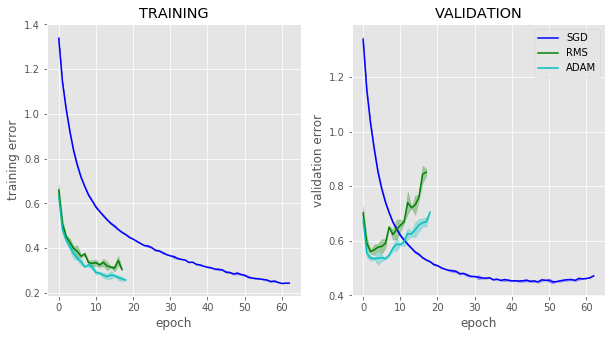

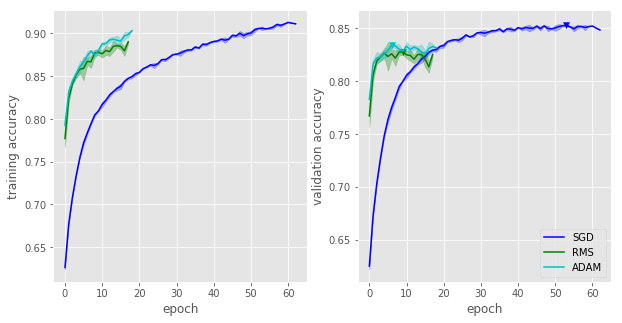

In [179]:
fig1, fig2, ax11, ax12, ax21, ax22 = plot_graph_mean_std(
    LR_wReg_mu_rho, best_epochs)

### Finding the best parameters for RMSProp